In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split

import functions.ml_functions as ml
import functions.misc_functions as misc
import functions.metrics as mtr

datasets with a 1 are buckingham street  
datasets with a 2 are kilmainham gaol

In [2]:
ten1 = pd.read_csv('data/ten_min.csv')
ten2 = pd.read_csv('data/ten_min_2.csv')
thirty1 = pd.read_csv('data/thirty_min.csv')
thirty2 = pd.read_csv('data/thirty_min_2.csv')
sixty1 = pd.read_csv('data/sixty_min.csv')
sixty2 = pd.read_csv('data/sixty_min_2.csv')

In [3]:
df1 = ten1
df2 = ten2
df3 = thirty1
df4 = thirty2
df5 = sixty1
df6 = sixty2

In [4]:
df5

,Unnamed: 0,AVAILABLE BIKES,t,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,B60,B65,B70,B75,B80,DB1,DB2,DDB1DB2
0,16,20,0.055556,0,1,0,0,0,0,0,23,23,23,23,23,0,0,0
1,17,20,0.059028,0,1,0,0,0,0,0,22,23,23,23,23,1,0,-1
2,18,19,0.062500,0,1,0,0,0,0,0,22,22,23,23,23,0,1,1
3,19,18,0.065972,0,1,0,0,0,0,0,22,22,22,23,23,0,0,0
4,20,17,0.069444,0,1,0,0,0,0,0,22,22,22,22,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,17986,14,0.982639,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17971,17987,14,0.986111,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17972,17988,14,0.989583,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17973,17989,14,0.993056,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0


In [5]:
def train_ridge(input_features, target_feature, alpha_value):
    """
    Fits a ridge regressor to a set of data
    Parameters
    ----------
    input_features : numpy.ndarray
        features
    target_feature : numpy.ndarray
        target features
    alpha_value : float
        used to determine strength of regularisation
    Returns
    ----------
    model : linear_model.Ridge
    """
    ### train a Ridge regression model.
    ### alpha seems to be approximately 1/c
    ### https://stats.stackexchange.com/questions/216095/how-does-alpha-relate-to-c-in-scikit-learns-sgdclassifier
    model = Ridge(alpha=alpha_value, max_iter=1000000000)
    model.fit(input_features, target_feature)
    # print('coeffs =',model.coef_)
    return model

In [6]:
def stack_features(df:pd.DataFrame):
    X1 = df.iloc[:, 2]
    X2 = df.iloc[:, 3]
    X3 = df.iloc[:, 4]
    X4 = df.iloc[:, 5]
    X5 = df.iloc[:, 6]
    X6 = df.iloc[:, 7]
    X7 = df.iloc[:,8]
    X8 = df.iloc[:, 9]
    X9 = df.iloc[:, 10]
    X10 = df.iloc[:, 11]
    X11 = df.iloc[:, 12]
    X12 = df.iloc[:,13]
    X13 = df.iloc[:, 14]
    X14 = df.iloc[:, 15]
    X15 = df.iloc[:,16]
    X16 = df.iloc[:, 17]
    X = np.column_stack((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16))

    Y = df.iloc[:, 1]
    return X, Y

In [7]:
X1, Y1 =stack_features(df1) 
X2, Y2 = stack_features(df2)
X3, Y3 =stack_features(df3) 
X4, Y4 = stack_features(df4)
X5, Y5 =stack_features(df5) 
X6, Y6 = stack_features(df6)


In [8]:
def train_Kfold_ridge(X_features, y_features, c_value):
    """
    Uses K-fold cross validation 
    Parameters
    ----------
    X_features : array 
        features
    y_features : array
        target features
    c_value : float
        parameter for training
    Returns
    ----------
    mean error : float
    standard error : float
    """
    kf = KFold(n_splits=5)
    model = Ridge(alpha=1/(2*c_value))
    errs = []
    # model = linear_model.Lasso(alpha=1/(2*c_value), max_iter=1000000000).fit()
    for train, test in kf.split(X_features):
        model.fit(X_features[train],y_features[train])
        ypred = model.predict(X_features[test])
        from sklearn.metrics import mean_squared_error
        # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
        errs.append(mean_squared_error(y_features[test],ypred))
    # print(np.mean(errs))
    return np.mean(errs), np.std(errs)

In [9]:
# def Kfold_for_C_ridge(X_features, y_features, C_range, title:str):
#     """
#     Uses K-fold cross validation with varied values of C
#     Parameters
#     ----------
#     X_features : array 
#         features
#     y_features : array
#         target features
#     C_range : array of float
#         parameters for training
#     Returns
#     ----------
#     nothing
#     """
#     error_array = np.zeros(len(C_range))
#     std_dev_array = np.zeros(len(C_range))
#     for i in range(len(C_range)):
#         # print("\n\n C = %f"%(C_range[i]))
#         error_array[i], std_dev_array[i] = train_Kfold_ridge(X_features, y_features, C_range[i])


#     # print(error_array)

#     plt.figure(title)
#     plt.errorbar(C_range, error_array, yerr=std_dev_array)
#     plt.xlabel('C value')
#     plt.ylabel('Mean Squared Error')
#     plt.title(title)
#     # x = np.arange(len(error_array))
#     # plt.bar(x, C_range, error_array)

C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14593e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02525e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\conor\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46265e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


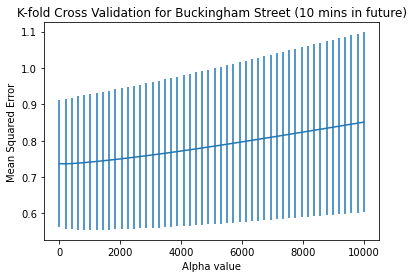

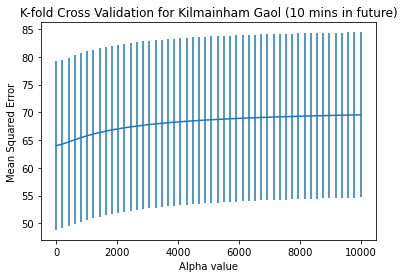

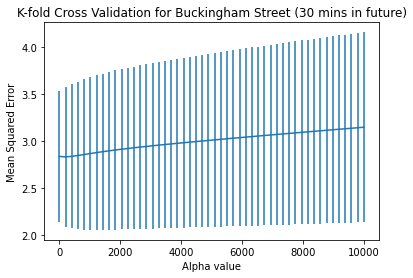

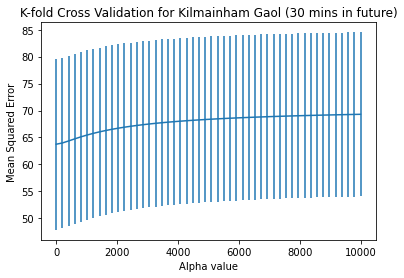

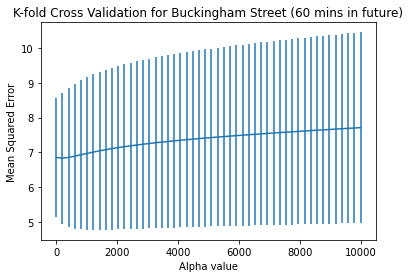

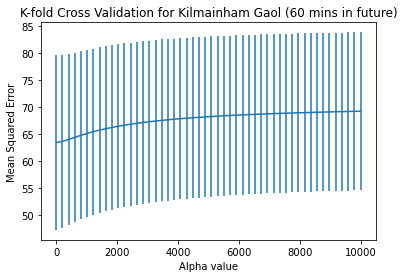

In [10]:
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X1, Y1, alphas,'K-fold Cross Validation for Buckingham Street (10 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X2, Y2, alphas,'K-fold Cross Validation for Kilmainham Gaol (10 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X3, Y3, alphas,'K-fold Cross Validation for Buckingham Street (30 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X4, Y4, alphas,'K-fold Cross Validation for Kilmainham Gaol (30 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X5, Y5, alphas,'K-fold Cross Validation for Buckingham Street (60 mins in future)')
alphas = np.linspace(0.00000000001, 10000,num=50)
ml.Kfold_for_alpha_ridge(X6, Y6, alphas,'K-fold Cross Validation for Kilmainham Gaol (60 mins in future)')


minimised by (around) 1 for all

It seems like they all have more or less the exact same curve  - this was a bug  
when looking closer the further into the future values will undoubtedly have worse performance

I now feel that I can use the same model for all 6 datasets,  
Changing alpha has minimal difference

In [11]:
# model = train_ridge(X1, Y1, 1.25e-8)
# ml.generate_predictions(model, X1)

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.3, random_state=42)

In [13]:
model1 = Ridge(alpha=1).fit(X1_train,y1_train)
predictions1 = ml.generate_predictions(model1, X1_test)
mse1 = mtr.calculate_mse(predictions1,y1_test)
r21 = mtr.calculate_R2(predictions1,y1_test)
train_predictions1 = ml.generate_predictions(model1, X1_train)
train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

model2 = Ridge(alpha=1).fit(X2_train,y2_train)
predictions2 = ml.generate_predictions(model2, X2_test)
mse2 = mtr.calculate_mse(predictions2,y2_test)
r22 = mtr.calculate_R2(predictions2,y2_test)
train_predictions2 = ml.generate_predictions(model2, X2_train)
train_mse2 = mtr.calculate_mse(train_predictions2,y2_train)

model3 = Ridge(alpha=1).fit(X3_train,y3_train)
predictions3 = ml.generate_predictions(model3, X3_test)
mse3 = mtr.calculate_mse(predictions3,y3_test)
r23 = mtr.calculate_R2(predictions3,y3_test)
train_predictions3 = ml.generate_predictions(model3, X3_train)
train_mse3 = mtr.calculate_mse(train_predictions3,y3_train)

model4 = Ridge(alpha=1).fit(X4_train,y4_train)
predictions4 = ml.generate_predictions(model4, X4_test)
mse4 = mtr.calculate_mse(predictions4,y4_test)
r24 = mtr.calculate_R2(predictions4,y4_test)
train_predictions4 = ml.generate_predictions(model4, X4_train)
train_mse4 = mtr.calculate_mse(train_predictions4,y4_train)

model5 = Ridge(alpha=1).fit(X5_train,y5_train)
predictions5 = ml.generate_predictions(model5, X5_test)
mse5 = mtr.calculate_mse(predictions5,y5_test)
r25 = mtr.calculate_R2(predictions5,y5_test)
train_predictions5 = ml.generate_predictions(model5, X5_train)
train_mse5 = mtr.calculate_mse(train_predictions5,y5_train)

model6 = Ridge(alpha=1).fit(X6_train,y6_train)
predictions6 = ml.generate_predictions(model6, X6_test)
mse6 = mtr.calculate_mse(predictions6,y6_test)
r26 = mtr.calculate_R2(predictions6,y6_test)
train_predictions6 = ml.generate_predictions(model6, X6_train)
train_mse6 = mtr.calculate_mse(train_predictions6,y6_train)

In [14]:
train_mse1

0.7111361993403266

In [15]:
print(model1.coef_)
print(model2.coef_)

[ 0.52246768 -0.03353782  0.01274598  0.00358737  0.02286225 -0.04850266
  0.02002006  0.02282481  0.67988567  0.3207266   0.08125826  0.01417714
 -0.11030748 -0.35915907 -0.23946834  0.11969073]
[ 9.82260516 -0.94154097 -1.12736863 -0.35328144 -0.24477402 -1.13466241
  1.78681826  2.01480921 -0.18249152 -0.09742625 -0.08290717 -0.03802021
  0.7152089   0.08506527  0.01451907 -0.0705462 ]


In [16]:
print(f"mse 1: {mse1}, training mse = {train_mse1}, r_2 = {r21}")
print(f"mse 2: {mse2}, training mse = {train_mse2}, r_2 = {r22}")
print(f"mse 3: {mse3}, training mse = {train_mse3}, r_2 = {r23}")
print(f"mse 4: {mse4}, training mse = {train_mse4}, r_2 = {r24}")
print(f"mse 5: {mse5}, training mse = {train_mse5}, r_2 = {r25}")
print(f"mse 6: {mse6}, training mse = {train_mse6}, r_2 = {r26}")


mse 1: 0.778038465888961, training mse = 0.7111361993403266, r_2 = 0.9903718113651032
mse 2: 53.24172211963502, training mse = 52.695545334676844, r_2 = 0.34113624674211973
mse 3: 2.8980902949976604, training mse = 2.7341336117216026, r_2 = 0.9643255775106485
mse 4: 52.62102059700023, training mse = 52.36387769013843, r_2 = 0.35225464719353505
mse 5: 7.206380333828185, training mse = 6.352380868560422, r_2 = 0.9100266256969147
mse 6: 52.04556324745041, training mse = 52.25522421256506, r_2 = 0.3501987508352622


Dummy Predictor should just be the most recent value

In [17]:
dummy_preds_1 = X1_test[:,8]
dummy_mse_1 = mtr.calculate_mse(dummy_preds_1,y1_test)
dummy_r21 = mtr.calculate_R2(dummy_preds_1,y1_test)
dummy_preds_2 = X2_test[:,8]
dummy_mse_2 = mtr.calculate_mse(dummy_preds_2,y2_test)
dummy_r22 = mtr.calculate_R2(dummy_preds_2,y2_test)
dummy_preds_3 = X3_test[:,8]
dummy_mse_3 = mtr.calculate_mse(dummy_preds_3,y3_test)
dummy_r23 = mtr.calculate_R2(dummy_preds_3,y3_test)
dummy_preds_4 = X4_test[:,8]
dummy_mse_4 = mtr.calculate_mse(dummy_preds_4,y4_test)
dummy_r24 = mtr.calculate_R2(dummy_preds_4,y4_test)
dummy_preds_5 = X5_test[:,8]
dummy_mse_5 = mtr.calculate_mse(dummy_preds_5,y5_test)
dummy_r25 = mtr.calculate_R2(dummy_preds_5,y5_test)
dummy_preds_6 = X6_test[:,8]
dummy_mse_6 = mtr.calculate_mse(dummy_preds_6,y6_test)
dummy_r26 = mtr.calculate_R2(dummy_preds_6,y6_test)

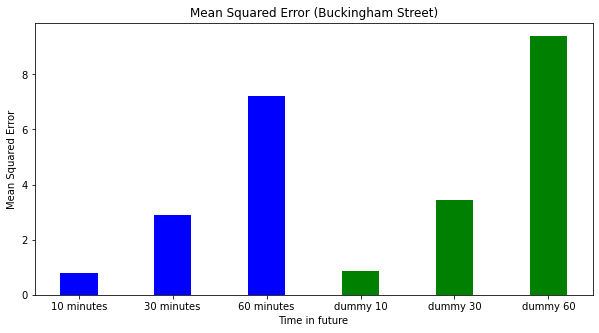

In [24]:
data1 = {'10 minutes':mse1, '30 minutes':mse3, '60 minutes':mse5}
data2 = {'dummy 10':dummy_mse_1, 'dummy 30':dummy_mse_3, 'dummy 60':dummy_mse_5}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.4)

plt.bar(keys2, values2, color ='green',
        width = 0.4)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Buckingham Street)")
plt.show()

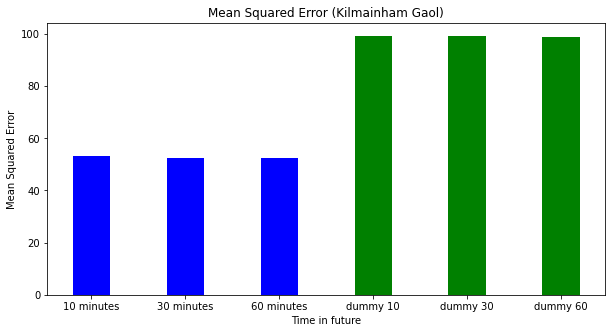

In [23]:
data1 = {'10 minutes':mse2, '30 minutes':mse4, '60 minutes':mse4}
data2 = {'dummy 10':dummy_mse_2, 'dummy 30':dummy_mse_4, 'dummy 60':dummy_mse_6}
keys1 = list(data1.keys())
values1 = list(data1.values())
keys2 = list(data2.keys())
values2 = list(data2.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys1, values1, color ='blue',
        width = 0.4)

plt.bar(keys2, values2, color ='green',
        width = 0.4)

plt.xlabel("Time in future")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error (Kilmainham Gaol)")
plt.show()

### plot preds and truths

### Redo with polynomial features.

In [20]:
polyX1 = misc.make_poly_data(X1, 2)
polyX2 = misc.make_poly_data(X2, 2)
polyX3 = misc.make_poly_data(X3, 2)
polyX4 = misc.make_poly_data(X4, 2)
polyX5 = misc.make_poly_data(X5, 2)
polyX6 = misc.make_poly_data(X6, 2)

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(polyX1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(polyX2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(polyX3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(polyX4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(polyX5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(polyX6, Y6, test_size=0.3, random_state=42)

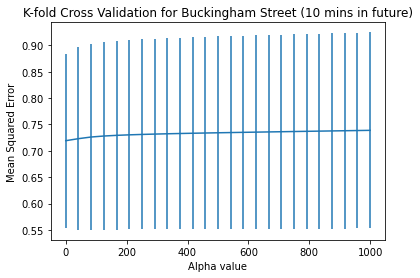

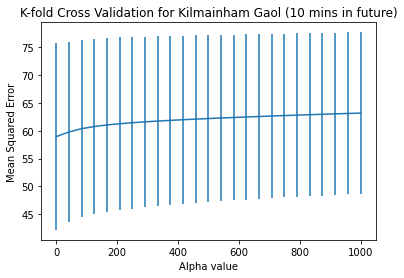

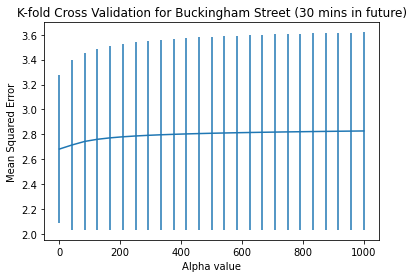

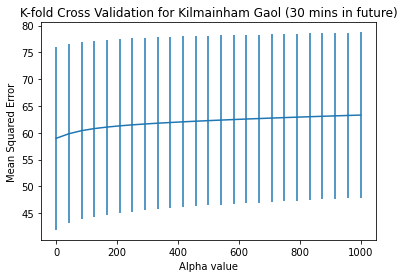

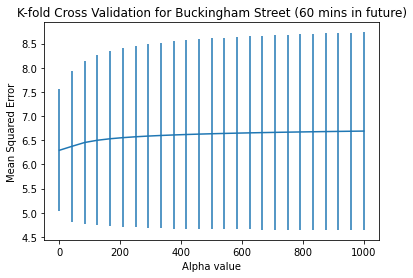

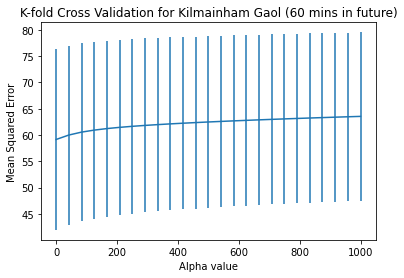

In [29]:
alphas = np.linspace(0.00000000001, 1000,num=25)
ml.Kfold_for_alpha_ridge(polyX1,Y1,alphas, 'K-fold Cross Validation for Buckingham Street (10 mins in future)')

ml.Kfold_for_alpha_ridge(polyX2,Y2,alphas, 'K-fold Cross Validation for Kilmainham Gaol (10 mins in future)')

ml.Kfold_for_alpha_ridge(polyX3,Y3,alphas, 'K-fold Cross Validation for Buckingham Street (30 mins in future)')

ml.Kfold_for_alpha_ridge(polyX4,Y4,alphas, 'K-fold Cross Validation for Kilmainham Gaol (30 mins in future)')

ml.Kfold_for_alpha_ridge(polyX5,Y5,alphas, 'K-fold Cross Validation for Buckingham Street (60 mins in future)')

ml.Kfold_for_alpha_ridge(polyX6,Y6,alphas, 'K-fold Cross Validation for Kilmainham Gaol (60 mins in future)')